Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
•	Построить график Precision - Recall на этих же данных


In [ ]:
# Строим логистическую регрессию - угадываем доход человека

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv( 'adult.csv' , na_values='?' ) #не заполненные значения в виде ? сразу преобразуем в NA)
data.head(10)
        

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [18]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
df=data[['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
         'capital-gain', 'capital-loss', 'native-country', 'income']] #Оставляем колонки по которым будем делать предсказание 
# и результирующий класс
df=df.dropna() #удаляем NA, чтобы убрать их влияние на предсказание

In [20]:
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,capital-gain,capital-loss,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0,0,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0,0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,0,0,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,7688,0,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,0,0,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,3103,0,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,40,0,0,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,10,0,0,United-States,<=50K
10,65,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,6418,0,United-States,>50K
11,36,Federal-gov,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,0,0,United-States,<=50K


In [21]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

In [27]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = df[ [ 'age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
         'capital-gain', 'capital-loss', 'native-country', 'income']]
# столбецы с  категориальной переменной
# переведем  в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies( selectedColumns, columns = [ 'workclass', 'education','marital-status', 'occupation',
                                                'relationship', 'race', 'gender', 'native-country' ] )

# столбец 'income' является целевой переменной, удаляем его из X
del X['income']
X.head()

,age,hours-per-week,capital-gain,capital-loss,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,7688,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,30,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:

# целевая переменная (столбец 'income') снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
le.fit( df['income'] )

LabelEncoder()

In [24]:
# записываем в переменную y преобразованный столбец 

y = pd.Series(data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [25]:
model = LogisticRegression(max_iter=1000)

In [28]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 100)
model.fit( X_train, y_train )


LogisticRegression(max_iter=1000)

In [ ]:
# Получаем прогнозные значения модели (переменная predictions)

In [29]:
predictions = model.predict_proba(X_test)

In [30]:
model.score(X_test, y_test)

0.8491928945234761

Используем готовые библиотеки

In [31]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [32]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [35]:
# # посмотрим что получилось
# for line in zip( pr, re, thres ):
#     print( line )

In [33]:
from matplotlib import pyplot as plt

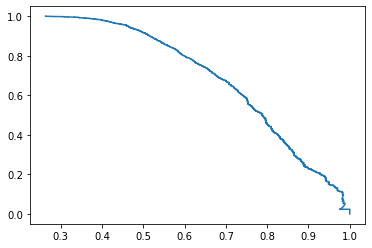

In [34]:
plt.plot( pr, re )

In [35]:
from sklearn.metrics import average_precision_score

In [36]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.7606835666530385

# ROC 

In [37]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [38]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [31]:
# for line in zip( fpr, tpr, thres ):
#     print( line )

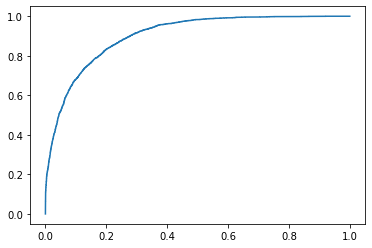

In [39]:
plt.plot( fpr, tpr )

In [48]:
# площадь под кривой

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score( y_test, predictions[:, 1] )

0.9021237263233264

In [42]:
from sklearn.metrics import auc

In [43]:
auc( fpr, tpr )

0.9021237263233264

In [ ]:
# Считаем accuracy в ручную

In [44]:
def find_fpr_tpr_prec_recall(predictions, y_test, treshold, find_precision=False):
    '''функция вручную считает значения для матрицы ошибок
    В зависимости от флага find_precision возвращает пару значений precision-recall или пару значений fpr-tpr'''
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
        if predicted_prob >= treshold:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
            
    if tp+fp==0:
        precision = None
    else:
        precision = tp / (tp + fp)
        
    recall = tp / (tp + fn)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    if find_precision:
        return precision, recall
    
    return tpr, fpr

In [45]:
thresholds = np.linspace(0, 1, 200)

In [46]:
tpr_list=[]
fpr_list=[]
for i in range(len(thresholds)):
    tpr, fpr = find_fpr_tpr_prec_recall(predictions, y_test, thresholds[i])
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    

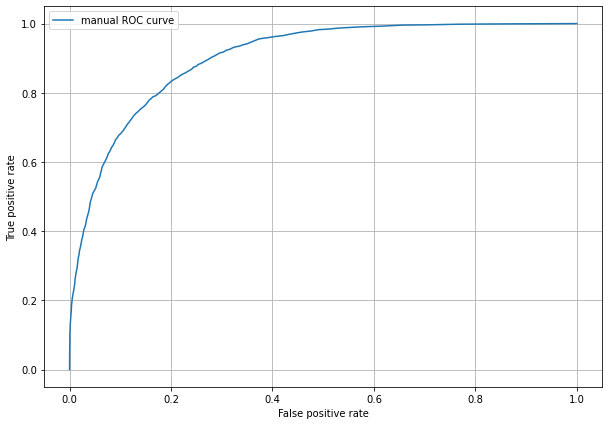

In [47]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr_list,tpr_list, label='manual ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()

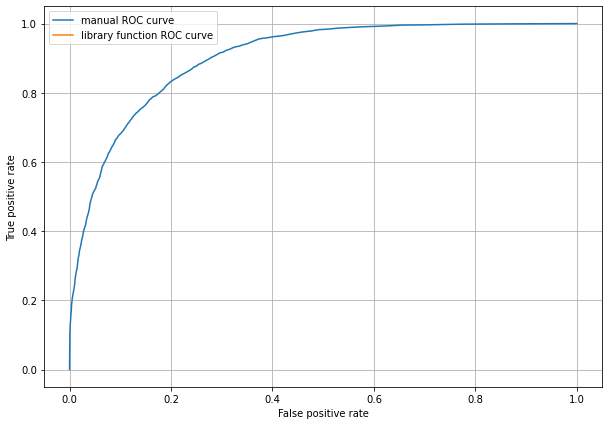

In [48]:
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(fpr_list,tpr_list, label='manual ROC curve')
plt.plot( fpr, tpr, label='library function ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()